#**MORTALITY RATE ANALYSIS AND PREDICITON**

<p align="center">
  <img width="600" height="325" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQkQz50DoqEHuYF7JGsWxfdBPOagT-geA5X_A&usqp=CAU">
</p>

* A mortality rate is the number of deaths due to a disease divided by the total population. If there are 25 lung cancer deaths in one year in a population of 30,000, then the mortality rate for that population is 83 per 100,000.

* We use mortality statistics to: produce population estimates and population projections, both national and subnational, produce life expectancy estimates, and quality assure census estimates.

### The dataset being used is curated from WHO's Health Dataset catalog. It contains mortality rate for people worldwide classified on age and gender.
https://www.kaggle.com/datasets/navinmundhra/world-mortality


##IMPORT THE LIBRARIES

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import *
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

## Distribution graphs of column data


In [4]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'g', edgecolor = 'g')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 2.0, w_pad = 3.0, h_pad = 1.0)
    plt.show()

### NOW WE CAN LOAD THE DATASETS ONE BY ONE AND CREATE PLOTS FOR EACH ONE OF THEM

##IMPORT THE ADULT MORTALITY DATASET

In [7]:
nRowsRead = 1000 
# Adult mortality.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/content/Adult mortality.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'Adult mortality.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 5 columns


In [8]:
df1.shape

(1000, 5)

In [9]:
df1.info

<bound method DataFrame.info of       Unnamed: 0 Unnamed: 1  \
0        Country       Year   
1    Afghanistan       2016   
2    Afghanistan       2015   
3    Afghanistan       2014   
4    Afghanistan       2013   
..           ...        ...   
995      Finland       2008   
996      Finland       2007   
997      Finland       2006   
998      Finland       2005   
999      Finland       2004   

    Adult mortality rate (probability of dying between 15 and 60 years per 1000 population)  \
0                                           Both sexes                                        
1                                                  245                                        
2                                                  233                                        
3                                                  234                                        
4                                                  235                                        
..                       

In [10]:
df1.describe()

,Unnamed: 0,Unnamed: 1,Adult mortality rate (probability of dying between 15 and 60 years per 1000 population),Adult mortality rate (probability of dying between 15 and 60 years per 1000 population).1,Adult mortality rate (probability of dying between 15 and 60 years per 1000 population).2
count,1000,1000,1000,1000,1000
unique,60,18,363,377,324
top,Cameroon,2008,101,205,68
freq,17,59,16,12,16


In [11]:
df1 = df1.iloc[1:, :]
df1.head(20)

,Unnamed: 0,Unnamed: 1,Adult mortality rate (probability of dying between 15 and 60 years per 1000 population),Adult mortality rate (probability of dying between 15 and 60 years per 1000 population).1,Adult mortality rate (probability of dying between 15 and 60 years per 1000 population).2
1,Afghanistan,2016,245,272,216
2,Afghanistan,2015,233,254,210
3,Afghanistan,2014,234,254,213
4,Afghanistan,2013,235,254,215
5,Afghanistan,2012,242,262,221
6,Afghanistan,2011,248,268,227
7,Afghanistan,2010,255,275,233
8,Afghanistan,2009,260,281,238
9,Afghanistan,2008,265,286,243
10,Afghanistan,2007,273,294,250


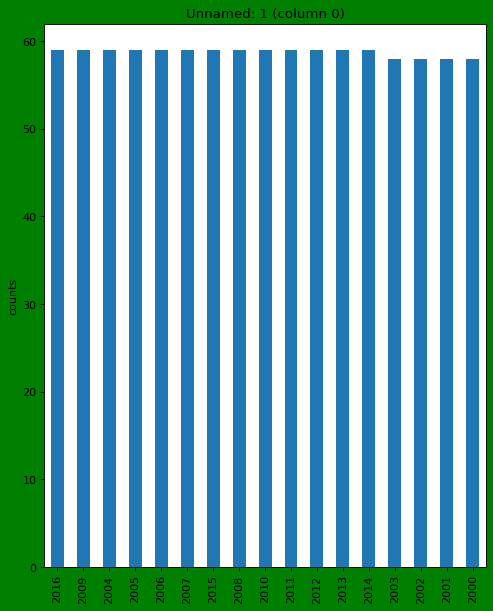

In [12]:
plotPerColumnDistribution(df1, 15, 9)


##IMPORT THE MATERNAL MORTALITY DATASET

In [13]:
nRowsRead = 1000 
# Maternal mortality.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('/content/Maternal mortality.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'Maternal mortality.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 4 columns


In [14]:
df2.head(10)

,Country,Year,Maternal mortality ratio (per 100 000 live births),Number of maternal deaths
0,Afghanistan,2017,638 [ 427 - 1 010 ],7 700 [ 5 100 - 12 000 ]
1,Afghanistan,2016,673 [ 457 - 1 040 ],8 100 [ 5 500 - 12 000 ]
2,Afghanistan,2015,701 [ 501 - 1 020 ],8 400 [ 6 000 - 12 000 ]
3,Afghanistan,2014,786 [ 592 - 1 080 ],9 300 [ 7 000 - 13 000 ]
4,Afghanistan,2013,810 [ 617 - 1 080 ],9 600 [ 7 300 - 13 000 ]
5,Afghanistan,2012,858 [ 662 - 1 130 ],10 000 [ 7 800 - 13 000 ]
6,Afghanistan,2011,905 [ 706 - 1 160 ],11 000 [ 8 300 - 14 000 ]
7,Afghanistan,2010,954 [ 749 - 1 210 ],11 000 [ 8 800 - 14 000 ]
8,Afghanistan,2009,993 [ 784 - 1 250 ],12 000 [ 9 200 - 15 000 ]
9,Afghanistan,2008,1 030 [ 813 - 1 290 ],12 000 [ 9 500 - 15 000 ]


In [15]:
df2.shape

(1000, 4)

In [16]:
df2.info

<bound method DataFrame.info of          Country  Year Maternal mortality ratio (per 100 000 live births)  \
0    Afghanistan  2017                                638 [ 427 - 1 010 ]   
1    Afghanistan  2016                                673 [ 457 - 1 040 ]   
2    Afghanistan  2015                                701 [ 501 - 1 020 ]   
3    Afghanistan  2014                                786 [ 592 - 1 080 ]   
4    Afghanistan  2013                                810 [ 617 - 1 080 ]   
..           ...   ...                                                ...   
995     Eswatini  2012                                  435 [ 272 - 718 ]   
996     Eswatini  2011                                  441 [ 280 - 711 ]   
997     Eswatini  2010                                  450 [ 292 - 707 ]   
998     Eswatini  2009                                  460 [ 302 - 704 ]   
999     Eswatini  2008                                  474 [ 318 - 708 ]   

    Number of maternal deaths  
0    7 700 

In [17]:
df2.describe()

,Year
count,1000.000000
mean,2008.540000
std,5.187997
min,2000.000000
25%,2004.000000
50%,2009.000000
75%,2013.000000
max,2017.000000


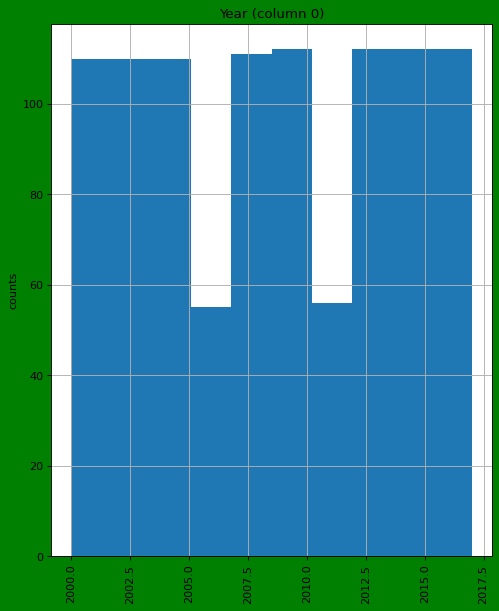

In [18]:
plotPerColumnDistribution(df2, 24, 9)

## LOAD THE NO. OF DEATHS DATASET


In [19]:
nRowsRead = 1000 
# Number of deaths (thousands).csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df3 = pd.read_csv('/content/Number of deaths (thousands).csv', delimiter=',', nrows = nRowsRead)
df3.dataframeName = 'Number of deaths (thousands).csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 9 columns


In [20]:
df3.head(10)

,Unnamed: 0,Unnamed: 1,Number of under-five deaths (thousands),Number of under-five deaths (thousands).1,Number of under-five deaths (thousands).2,Number of infant deaths (thousands),Number of infant deaths (thousands).1,Number of infant deaths (thousands).2,Number of neonatal deaths (thousands)
0,Country,Year,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes
1,Afghanistan,2018,74278,40312,33966,57182,31394,25788,44725
2,Afghanistan,2017,76877,41631,35246,58846,32244,26602,45771
3,Afghanistan,2016,79770,43134,36636,60673,33222,27451,46963
4,Afghanistan,2015,82918,44733,38185,62652,34257,28395,48237
5,Afghanistan,2014,86378,46509,39869,64808,35410,29398,49715
6,Afghanistan,2013,90103,48461,41642,67154,36656,30498,51219
7,Albania,2018,302,167,135,268,150,118,222
8,Albania,2017,313,174,139,278,156,122,221
9,Albania,2016,326,181,145,289,162,127,218


In [21]:
df3.shape

(1000, 9)

In [22]:
df3.info

<bound method DataFrame.info of       Unnamed: 0 Unnamed: 1 Number of under-five deaths (thousands)  \
0        Country       Year                              Both sexes   
1    Afghanistan       2018                                   74278   
2    Afghanistan       2017                                   76877   
3    Afghanistan       2016                                   79770   
4    Afghanistan       2015                                   82918   
..           ...        ...                                     ...   
995        Sudan       2014                                   85771   
996        Sudan       2013                                   87192   
997     Suriname       2018                                     201   
998     Suriname       2017                                     209   
999     Suriname       2016                                     217   

    Number of under-five deaths (thousands).1  \
0                                        Male   
1                

In [23]:
df3.describe()

,Unnamed: 0,Unnamed: 1,Number of under-five deaths (thousands),Number of under-five deaths (thousands).1,Number of under-five deaths (thousands).2,Number of infant deaths (thousands),Number of infant deaths (thousands).1,Number of infant deaths (thousands).2,Number of neonatal deaths (thousands)
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,168,7,842,793,767,834,778,745,786
top,Israel,2018,2,1,1,1,1,1,1
freq,6,167,14,16,27,16,18,22,17


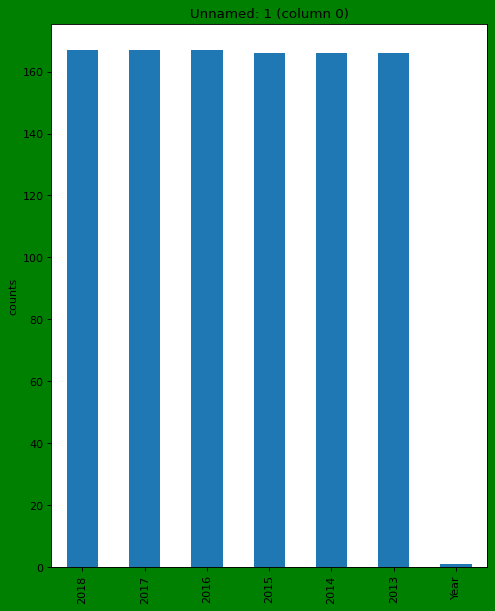

In [24]:
plotPerColumnDistribution(df3, 10, 5)

## CONCLUSION



### Different visualization techniques can be used to get deeper insights into data and hence make predictive analysis